In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px


import re  # regex

from bs4 import BeautifulSoup

import nltk
import nltk.corpus
from nltk.corpus import stopwords

#nltk.download()

from nltk.tokenize import word_tokenize
#from nltk import word_tokenize
nltk.download('punkt')

import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

from wordcloud import WordCloud, STOPWORDS
import collections

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
plt.style.use('default')
import squarify




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# dler = nltk.downloader.Downloader()
# dler._update_index()
# dler.download('all')

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
name = pd.read_csv("../web_scrap_database/candidate.csv")
name.shape

(150005, 7)

In [5]:
name.drop_duplicates(subset = 'Tweet', keep = 'first', inplace = True)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
name['Date Created'] = pd.to_datetime(name['Date Created'])

In [8]:
name['year'] = pd.DatetimeIndex(name['Date Created']).year.astype('str')
name['month'] = pd.DatetimeIndex(name['Date Created']).month.astype('str')
name['day'] = pd.DatetimeIndex(name['Date Created']).day.astype('str')

name['date'] =  name['year'] + '-' + name['month'] + '-' + name['day']
name['date'] = pd.to_datetime(name['date'])

In [9]:
name = name.drop(['User','Number of Likes',"year","month","day"], axis =1)
name

,location,Date Created,Source of Tweet,Tweet,name,date
0,"Kano, Nigeria",2022-08-25 23:59:32+00:00,Twitter Web App,@panther_wakanda @PeterObi The same Reno Mocke...,obi,2022-08-25
1,NaN,2022-08-25 23:59:22+00:00,Twitter for Android,@The_real_Teelaw @oluremisonaiya @PeterObi You...,obi,2022-08-25
2,NaN,2022-08-25 23:58:48+00:00,Twitter for iPhone,@gypsyprince09 @Emmadiebere @OfiabuluOsita @Vi...,obi,2022-08-25
3,NaN,2022-08-25 23:57:31+00:00,Twitter for Android,@renoomokri @PeterObi With all due respect sir...,obi,2022-08-25
4,"The Woodlands, TX",2022-08-25 23:56:22+00:00,Twitter for iPhone,@AGINAS @Germanprinz @PeterObi @GovernorIkpeaz...,obi,2022-08-25
...,...,...,...,...,...,...
150000,"Lagos, Nigeria",2022-08-22 08:29:59+00:00,Twitter for Android,@Ambrosia_Ijebu @fkeyamo @Mvnaaa___ @officialA...,Tinubu,2022-08-22
150001,Lagos Nigeria,2022-08-22 08:29:58+00:00,Twitter for Android,@fkeyamo @officialABAT 🤣🤣🤣🤣,Tinubu,2022-08-22
150002,Not Far from Earth,2022-08-22 08:29:53+00:00,Twitter for iPhone,@fkeyamo @officialABAT SAN isonu,Tinubu,2022-08-22
150003,"Lagos, Nigeria",2022-08-22 08:29:53+00:00,Twitter Web App,@fkeyamo @officialABAT Its crystal clear now t...,Tinubu,2022-08-22


In [10]:
# # #cleaning the tweets  tHIS ONE REMOVES or strips THE dupliate twitter hash tags e.g @ john @ timi, retains emorji , but makes space \n

# def remove_pattern(input_txt, pattern):
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)        
#     return input_txt
# def clean_tweets(tweets):
#     #remove twitter Return handles (RT @xxx:)
#     tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
#     #remove twitter handles (@xxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
#     #remove URL links (httpxxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     #remove special characters, numbers, punctuations (except for #)
#     tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
#     #remove new line
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     return tweets


# df['Tweet'] = df.Tweet.apply(lambda x :clean_tweets(x) )
# df

In [12]:
# stopword remover and preprocessing  channges emorji to lol also strip multiple hash tags

stopwords = set(stopwords.words("english"))
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp
name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweet(x) )

C:\Users\godwi\AppData\Local\Temp\ipykernel_21748\1938295927.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [13]:
# removes only @ from hash tags and converts emoji to lol

# def clean_lemmatize_token(tweet):
#     stop_words = set(stopwords.words('english'))
    
#     cleaned = tweet.translate(str.maketrans('', '', string.punctuation)).lower()
#     tokenized = word_tokenize(cleaned)
#     filtered = [w for w in tokenized if not w in stop_words]
#     lemmatizer = WordNetLemmatizer()
#     lemmatized = []
#     for word in filtered:
#         lemmatized.append(lemmatizer.lemmatize(word))
#     to_remove = ['rt','mention','sxsw','link',"RT @[\w]*:"]
#     lemmatized = [w for w in lemmatized if w not in to_remove]
#     lemmatized = ' '.join(lemmatized)
#     return lemmatized

# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_lemmatize_token(x) )



In [14]:
#Use with TFIDF 

# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()
# # pat1 = r'@[A-Za-z0-9]+'
# # pat2 = r'https?://[A-Za-z0-9./]+'
# # combined_pat = r'|'.join((pat1, pat2))

# def tweet_cleaner(text):
#     # soup = BeautifulSoup(text, 'lxml')
#     # souped = soup.get_text()
#     # stripped = re.sub(combined_pat, '', souped)
#     # try:
#     #     clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     # except:
#     #     clean = stripped
#     # letters_only = re.sub("[^a-zA-Z]", " ", clean)
#     # lower_case = letters_only.lower()
#     # During the letters_only process two lines above, it has created unnecessay white spaces,
#     # I will tokenize and join together to remove unneccessary white spaces
#     words = tok.tokenize(lower_case)
#     return (" ".join(words)).strip()

In [15]:
#Use with TFIDF 
# # Tokenization
# tk = word_tokenize
# df['Tweet'].apply(tk)

In [16]:
#Use with TFIDF 
# stop_words = set(stopwords.words('english'))

# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in stop_words])

# df['tweet_stopword'] = df['Tweet'].apply(lambda x:cleaning_stopwords(x) )
# df.head()

In [17]:
name.drop(name[name.tweet_preprocessed == ''].index,inplace = True)
name

,location,Date Created,Source of Tweet,Tweet,name,date,tweet_preprocessed
0,"Kano, Nigeria",2022-08-25 23:59:32+00:00,Twitter Web App,@panther_wakanda @PeterObi The same Reno Mocke...,obi,2022-08-25,reno mockery
1,NaN,2022-08-25 23:59:22+00:00,Twitter for Android,@The_real_Teelaw @oluremisonaiya @PeterObi You...,obi,2022-08-25,serious
2,NaN,2022-08-25 23:58:48+00:00,Twitter for iPhone,@gypsyprince09 @Emmadiebere @OfiabuluOsita @Vi...,obi,2022-08-25,lol obvious hate facts n result insults relax ...
3,NaN,2022-08-25 23:57:31+00:00,Twitter for Android,@renoomokri @PeterObi With all due respect sir...,obi,2022-08-25,due respect sir atiku supposed man hmmmhmmm in...
5,All over the world.,2022-08-25 23:56:18+00:00,Twitter for iPhone,@OselokaHObaze @PeterObi @doyinokupe @obi_medi...,obi,2022-08-25,governor na guyman abia state governor wey dey...
...,...,...,...,...,...,...,...
149998,NaN,2022-08-22 08:30:03+00:00,Twitter for Android,@fkeyamo @officialABAT You aren't lying. The 2...,Tinubu,2022-08-22,arent lying 2nd pic literally tinubu left offi...
149999,Lagos,2022-08-22 08:30:00+00:00,Twitter for Android,@KovieScofield @unclebobby86 @fkeyamo @officia...,Tinubu,2022-08-22,cos challenged status quo
150002,Not Far from Earth,2022-08-22 08:29:53+00:00,Twitter for iPhone,@fkeyamo @officialABAT SAN isonu,Tinubu,2022-08-22,san isonu
150003,"Lagos, Nigeria",2022-08-22 08:29:53+00:00,Twitter Web App,@fkeyamo @officialABAT Its crystal clear now t...,Tinubu,2022-08-22,crystal clear festus keyamo really sick please...


In [65]:
name.date.value_counts()

2022-08-24    34113
2022-08-25    30497
2022-08-22    18336
2022-08-23    17247
2022-08-21     8432
2022-08-20     5067
2022-08-09     3176
2022-08-19     3053
2022-08-05     2705
2022-08-03     1687
2022-08-06     1467
2022-08-11     1330
2022-08-02     1316
2022-08-07     1171
2022-08-10      940
2022-08-08      823
2022-08-18      648
2022-08-04      610
2022-08-12      586
2022-08-16      400
2022-08-15      394
2022-08-14      347
2022-08-17      331
2022-08-13      310
2022-08-01      165
Name: date, dtype: int64

# VADER FOR SENTIMENT

In [18]:
sentiments = SentimentIntensityAnalyzer()
name['Positive'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
name['Negetive'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neu'])
name['Neutral'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
name['compound'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['compound'])

In [19]:
score = name.compound.values
sentiment = []
for i in score:
    if i >=0.05 :
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

In [20]:
name['sentiment']= sentiment

In [21]:
name['sentiment'] = sentiment
tweet_final = name.loc[:,['tweet_preprocessed','sentiment']]
tweet_final

,tweet_preprocessed,sentiment
0,reno mockery,neutral
1,serious,positive
2,lol obvious hate facts n result insults relax ...,negative
3,due respect sir atiku supposed man hmmmhmmm in...,positive
5,governor na guyman abia state governor wey dey...,positive
...,...,...
149998,arent lying 2nd pic literally tinubu left offi...,positive
149999,cos challenged status quo,negative
150002,san isonu,neutral
150003,crystal clear festus keyamo really sick please...,positive


In [22]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,53892
neutral,41716
negative,39543


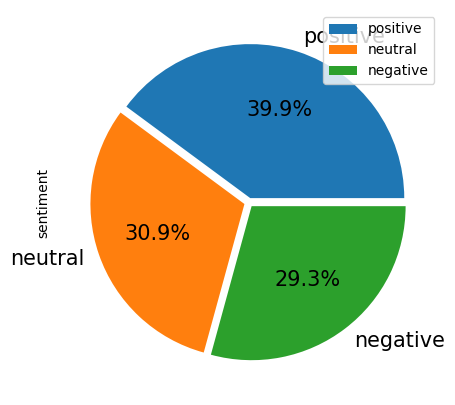

In [23]:
fig,ax = plt.subplots(figsize = (10,5))
tweet_final.sentiment.value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode=[0.03,0.03,0.03],textprops={'fontsize': 15})
ax.legend()

In [24]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,53892
neutral,41716
negative,39543


<AxesSubplot:ylabel='sentiment'>

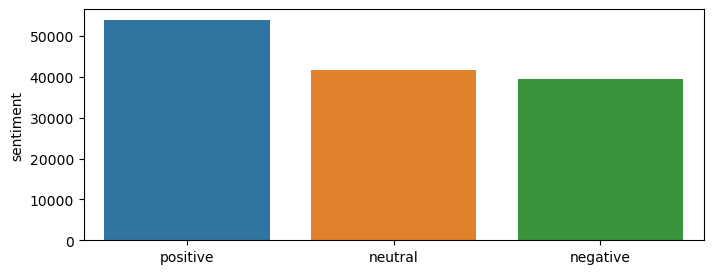

In [25]:
fig,ax = plt.subplots(figsize = (8,3))
sns.barplot(data = tweet_final.sentiment.value_counts().to_frame(), y = tweet_final.sentiment.value_counts().to_frame().sentiment,\
    x =tweet_final.sentiment.value_counts().to_frame().index)

In [26]:
tweet_final['sentiment_encoded'] = tweet_final.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

In [27]:
tweet_final.loc[:, ["tweet_preprocessed", "sentiment"]][tweet_final.loc[:, ["tweet_preprocessed", "sentiment"]].sentiment =='negative']['tweet_preprocessed']

2         lol obvious hate facts n result insults relax ...
7         lack depth smh yes man made mistake hasnt made...
13                         keep quiet listen po campaigning
15        u saying correcting mistake pple point wrong d...
18         believe assume everyone bullies po supporter smh
                                ...                        
149992                                       lies lies lies
149993    lol make u disclose identity agbero drug lord ...
149994    apc amp failed campaign 2014 amp apc told nige...
149997                                          teacher oya
149999                            cos challenged status quo
Name: tweet_preprocessed, Length: 39543, dtype: object

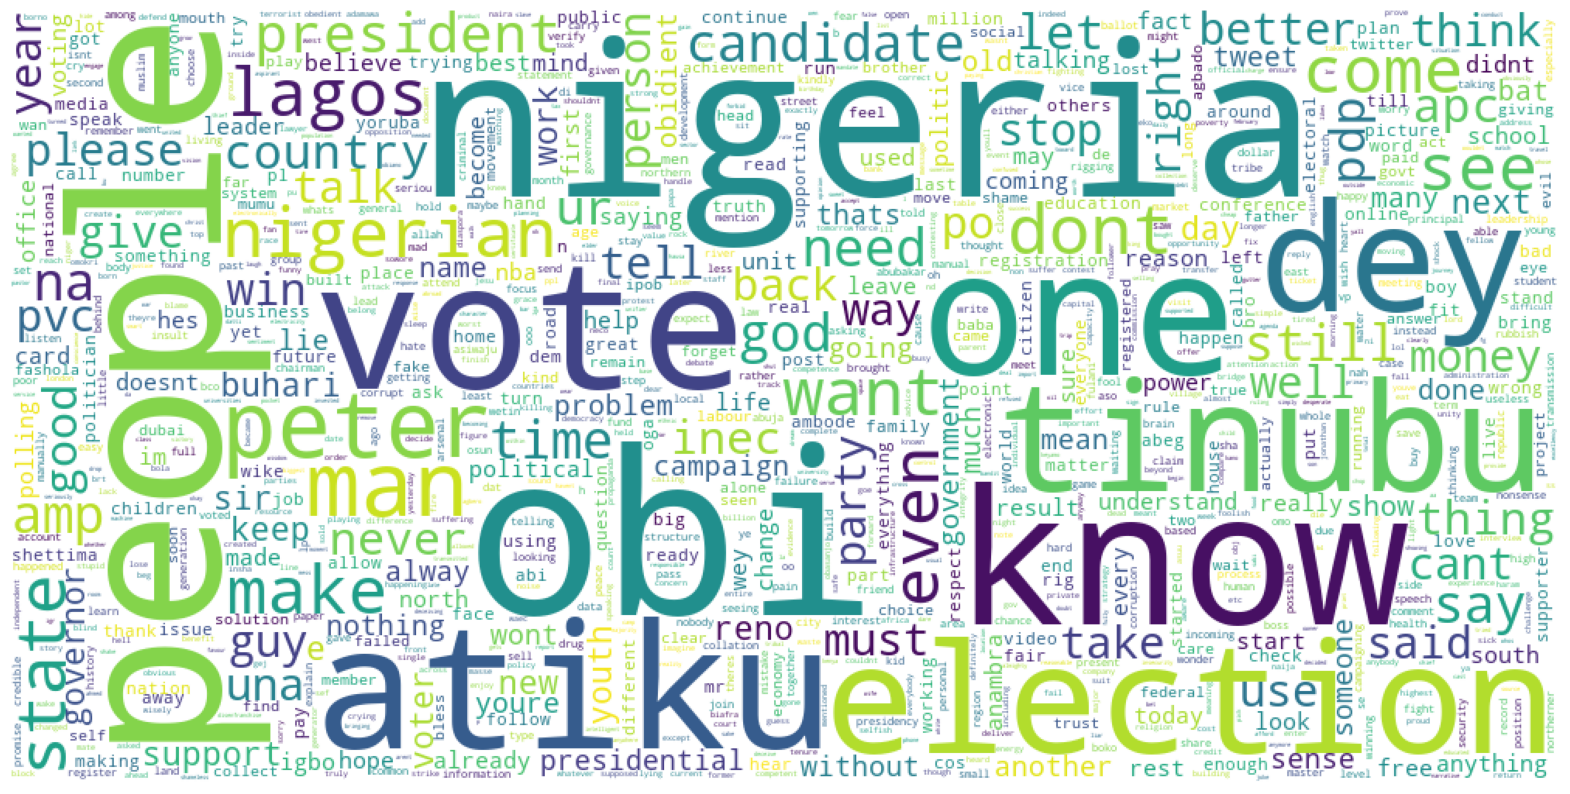

In [28]:
import collections

stopwords = STOPWORDS
stopwords.update(["https", "co","I","The","s","u","go","us"])


text = "".join(tweet_final.tweet_preprocessed)
fig, ax = plt.subplots(figsize = (20,20))
wc = WordCloud(stopwords=stopwords,max_words = 1000 , width = 1000 , \
    background_color='white',height = 500, collocations=False).generate(text)
plt.axis("off")
ax.imshow(wc);

In [29]:
filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [30]:
popular = pd.DataFrame(counted_words, index =[0]).T.reset_index().rename({"index":"word"},axis =1)\
    .rename({0 :"count"},axis =1).groupby("word").sum().sort_values("count",ascending= False)[:10]

In [31]:
popular

,count
word,
obi,10900
nigeria,9643
people,8830
know,6728
atiku,6235
dey,6127
one,6035
peter,5976
tinubu,5904


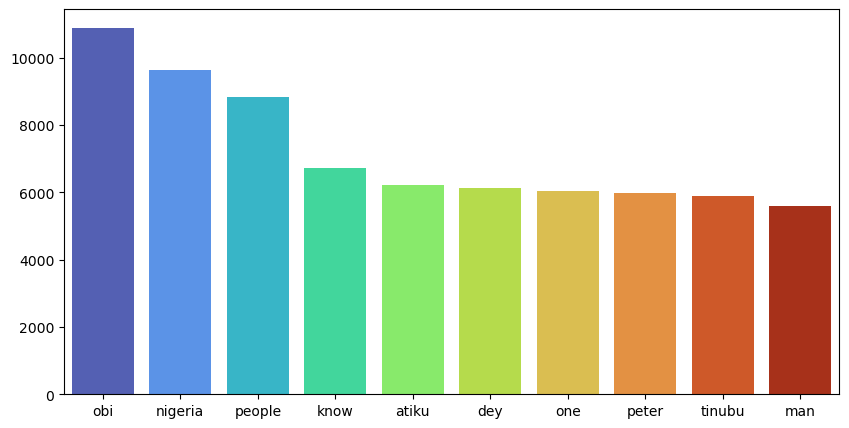

In [32]:
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot(x = words, y = counts, palette= 'turbo')
plt.show()

<AxesSubplot:ylabel='Source of Tweet'>

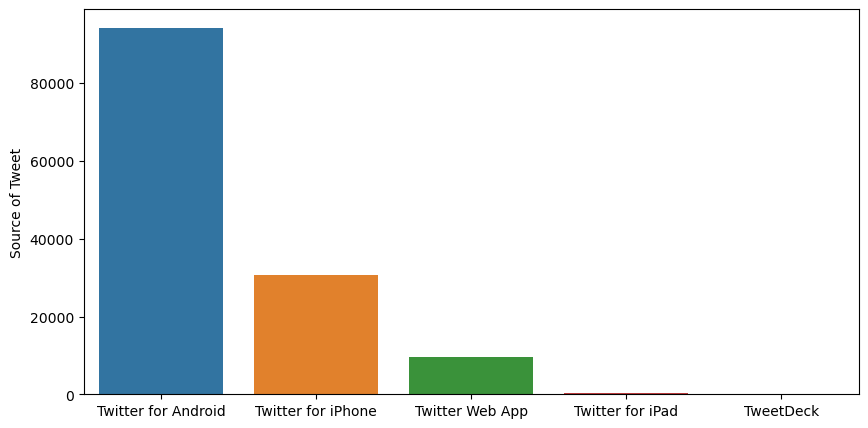

In [33]:
tweet_platform = name['Source of Tweet'].value_counts().head(5).to_frame()
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot( data = tweet_platform,  x = tweet_platform.index,  y = tweet_platform["Source of Tweet"])

In [34]:
tweet_platform

,Source of Tweet
Twitter for Android,94304
Twitter for iPhone,30711
Twitter Web App,9713
Twitter for iPad,283
TweetDeck,51


In [35]:
name

,location,Date Created,Source of Tweet,Tweet,name,date,tweet_preprocessed,Positive,Negetive,Neutral,compound,sentiment
0,"Kano, Nigeria",2022-08-25 23:59:32+00:00,Twitter Web App,@panther_wakanda @PeterObi The same Reno Mocke...,obi,2022-08-25,reno mockery,0.000,1.000,0.000,0.0000,neutral
1,NaN,2022-08-25 23:59:22+00:00,Twitter for Android,@The_real_Teelaw @oluremisonaiya @PeterObi You...,obi,2022-08-25,serious,0.169,0.831,0.000,0.0572,positive
2,NaN,2022-08-25 23:58:48+00:00,Twitter for iPhone,@gypsyprince09 @Emmadiebere @OfiabuluOsita @Vi...,obi,2022-08-25,lol obvious hate facts n result insults relax ...,0.122,0.711,0.167,-0.6209,negative
3,NaN,2022-08-25 23:57:31+00:00,Twitter for Android,@renoomokri @PeterObi With all due respect sir...,obi,2022-08-25,due respect sir atiku supposed man hmmmhmmm in...,0.216,0.784,0.000,0.7003,positive
5,All over the world.,2022-08-25 23:56:18+00:00,Twitter for iPhone,@OselokaHObaze @PeterObi @doyinokupe @obi_medi...,obi,2022-08-25,governor na guyman abia state governor wey dey...,0.113,0.822,0.065,0.3952,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
149998,NaN,2022-08-22 08:30:03+00:00,Twitter for Android,@fkeyamo @officialABAT You aren't lying. The 2...,Tinubu,2022-08-22,arent lying 2nd pic literally tinubu left offi...,0.140,0.860,0.000,0.4168,positive
149999,Lagos,2022-08-22 08:30:00+00:00,Twitter for Android,@KovieScofield @unclebobby86 @fkeyamo @officia...,Tinubu,2022-08-22,cos challenged status quo,0.000,0.877,0.123,-0.1027,negative
150002,Not Far from Earth,2022-08-22 08:29:53+00:00,Twitter for iPhone,@fkeyamo @officialABAT SAN isonu,Tinubu,2022-08-22,san isonu,0.000,1.000,0.000,0.0000,neutral
150003,"Lagos, Nigeria",2022-08-22 08:29:53+00:00,Twitter Web App,@fkeyamo @officialABAT Its crystal clear now t...,Tinubu,2022-08-22,crystal clear festus keyamo really sick please...,0.209,0.646,0.145,0.1494,positive


In [36]:
sent_tab = pd.crosstab(name.name, name.sentiment).transpose()
fig = px.bar(sent_tab,barmode='group',text_auto=True)
fig.update_layout(autosize=False, width=1000,    height=500,)
fig.show()

In [38]:
name_neg = name[name.sentiment == 'negative'].loc[:,["name","sentiment"]]
neg_sent = name_neg.groupby("name").count()
neg_sent


,sentiment
name,
Tinubu,7730
atiku,6745
inec,8732
obi,7196
reno,9140


In [40]:
fig =px.pie(neg_sent,names=neg_sent.index,values=neg_sent.sentiment, hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label',)
fig.update_layout(autosize=False, width=700, height=600,title = "Negative Sentiments")
fig.show()

In [39]:
name_pos = name[name.sentiment == 'positive'].loc[:,["name","sentiment"]]
pos_sent = name_pos.groupby("name").count()
pos_sent

,sentiment
name,
Tinubu,9807
atiku,11163
inec,10979
obi,12369
reno,9574


In [ ]:
name

In [41]:
fig =px.pie(pos_sent,names=pos_sent.index,values=pos_sent.sentiment,hole=.6)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(autosize=False, width=700, height=600,title = "Positive Sentiments",)

fig.show()

# Perform cluster of variuos twitter users

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
name_vec = name.iloc[:, [6,11]]
name_vec

,tweet_preprocessed,sentiment
0,reno mockery,neutral
1,serious,positive
2,lol obvious hate facts n result insults relax ...,negative
3,due respect sir atiku supposed man hmmmhmmm in...,positive
5,governor na guyman abia state governor wey dey...,positive
...,...,...
149998,arent lying 2nd pic literally tinubu left offi...,positive
149999,cos challenged status quo,negative
150002,san isonu,neutral
150003,crystal clear festus keyamo really sick please...,positive


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
name_vec['sentiment_encode'] = name_vec['sentiment'].apply(lambda x: -1 if x == 'negative' else 0 if x == 'neutral' else 1 )

C:\Users\godwi\AppData\Local\Temp\ipykernel_21748\3731929696.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
name_vec

,tweet_preprocessed,sentiment,sentiment_encode
0,reno mockery,neutral,0
1,serious,positive,1
2,lol obvious hate facts n result insults relax ...,negative,-1
3,due respect sir atiku supposed man hmmmhmmm in...,positive,1
5,governor na guyman abia state governor wey dey...,positive,1
...,...,...,...
149998,arent lying 2nd pic literally tinubu left offi...,positive,1
149999,cos challenged status quo,negative,-1
150002,san isonu,neutral,0
150003,crystal clear festus keyamo really sick please...,positive,1


In [63]:
name.to_csv("influencers.csv", index = False)

In [46]:
vectorizer = TfidfVectorizer(use_idf=True,stop_words='english')
X = name_vec.tweet_preprocessed
y = name_vec.sentiment

In [47]:
X = vectorizer.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [53]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.base import TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import MultinomialNB


# clf = RandomForestClassifier(random_state=42, n_estimators=50)
lr = LogisticRegression(max_iter=3000, random_state=42, n_jobs=-1)
kn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
sgd = SGDClassifier(random_state=42, n_jobs=-1)
# nb = MultinomialNB(alpha=0.02)



models = { "LogisticRegression" : lr,
         "KNeighborsClassifier": kn,
         "SGDClassifier": sgd
        #  "GaussianNB" :nb
         }

for model in models.keys():
    scores = cross_val_score(models[model], X, y, cv=5)
    
    print('model:' ,model)
    print('score:', scores)
    print('mean:' ,scores.mean())
    models[model].fit(X_train, y_train)
    print("accuracy_score:", (models[model].score(X_test, y_test)))
    print("training score:", (models[model].score(X_train, y_train)))
    print()


model: LogisticRegression
score: [0.82756835 0.81309656 0.75693674 0.8109508  0.79937107]
mean: 0.8015847016770443
accuracy_score: 0.8225740816100033
training score: 0.8652423233444321

model: KNeighborsClassifier
score: [0.41911139 0.41668516 0.38886422 0.39940807 0.39519053]
mean: 0.4038518748694737
accuracy_score: 0.4211830860863453
training score: 0.49346096929337774

model: SGDClassifier
score: [0.7850246  0.77491676 0.73111358 0.77776545 0.75756567]
mean: 0.7652772103248141
accuracy_score: 0.7817320853834486
training score: 0.8005086940436552



# Hypertuning 

In [54]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
param_grid = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "C" :[100, 20, 10, 1.0, 0.1, 0.01],
              "penalty" :['l2']
              }  
   
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3,n_jobs=-1,cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.



{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [55]:
confusion_matrix(y_test, grid_predictions)

array([[5713,  944, 1169],
       [ 388, 7559,  481],
       [ 991,  832, 8954]], dtype=int64)

In [56]:
y_pred = lr.predict(X_test)
y_pred_probab = grid.predict_proba(X_test)

In [57]:
accuracy_score(y_test, grid_predictions)

0.8222411305538085

In [58]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

    negative       0.81      0.73      0.77      7826
     neutral       0.81      0.90      0.85      8428
    positive       0.84      0.83      0.84     10777

    accuracy                           0.82     27031
   macro avg       0.82      0.82      0.82     27031
weighted avg       0.82      0.82      0.82     27031



In [59]:
cm  = confusion_matrix(y_test, grid_predictions)
cm = pd.DataFrame(cm)
cm

,0,1,2
0,5713,944,1169
1,388,7559,481
2,991,832,8954


<AxesSubplot:>

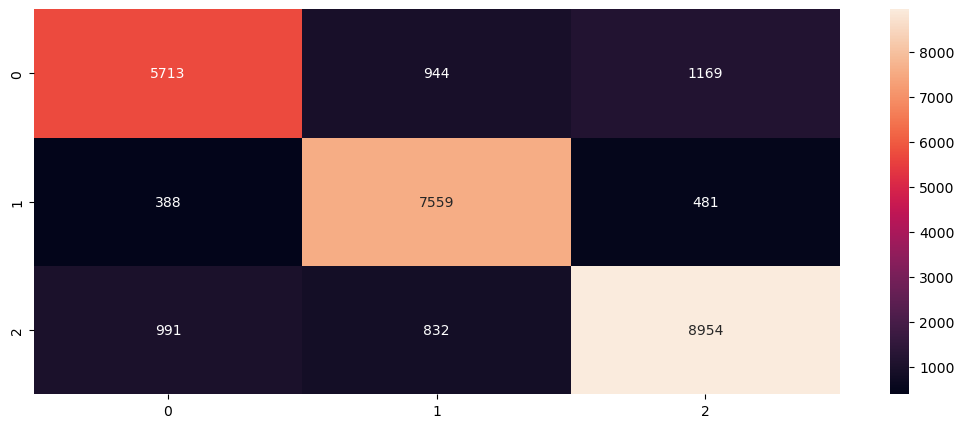

In [60]:
plt.subplots(figsize = (13,5))
sns.heatmap(cm, annot=True,fmt='g')

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

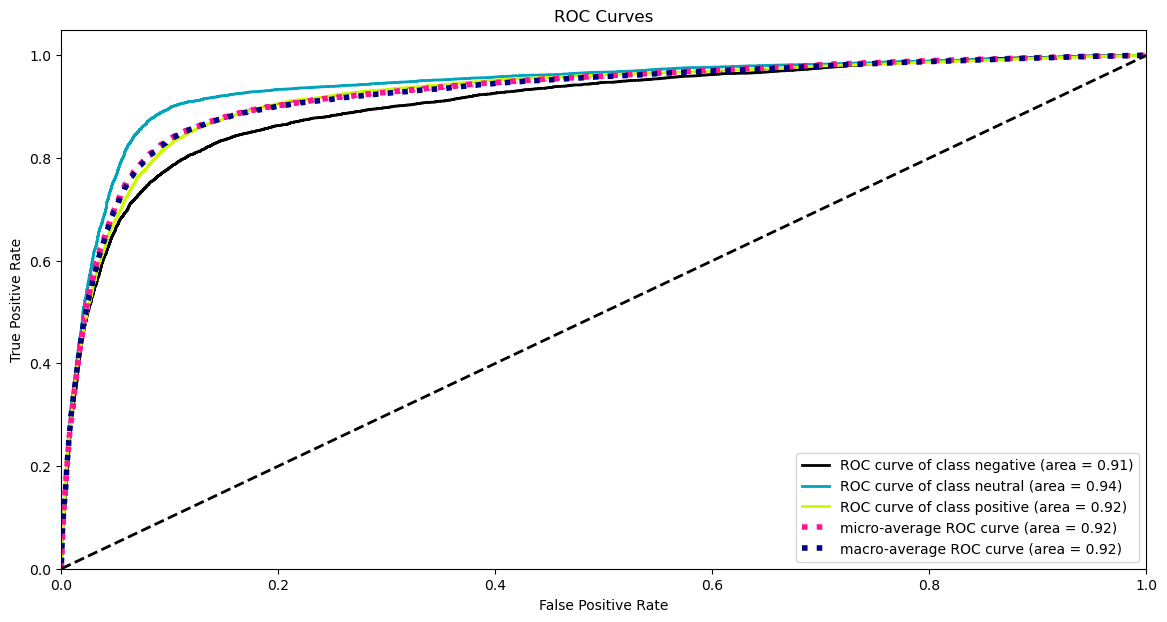

In [61]:
import scikitplot as skplt
fig, ax = plt.subplots(figsize=(14,7))
skplt.metrics.plot_roc(y_test, y_pred_probab,ax= ax)